## Goal: How large is each cluster?

In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
clusters = json.load(open('../Resources/20190713ReadingCategories.json'))

<BarContainer object of 32 artists>

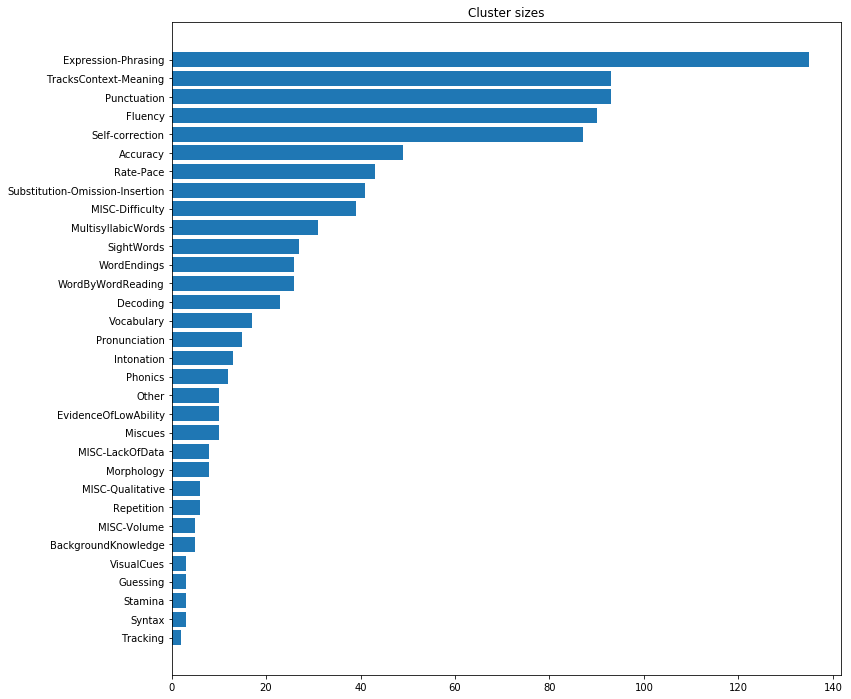

In [3]:
plt.figure(figsize=(12, 12))
plt.title('Cluster sizes')
x = sorted(list(clusters.keys()), key=lambda k: len(clusters[k]))
plt.barh(
    x,
    [
        len(clusters[k])
        for k in x
    ]
)

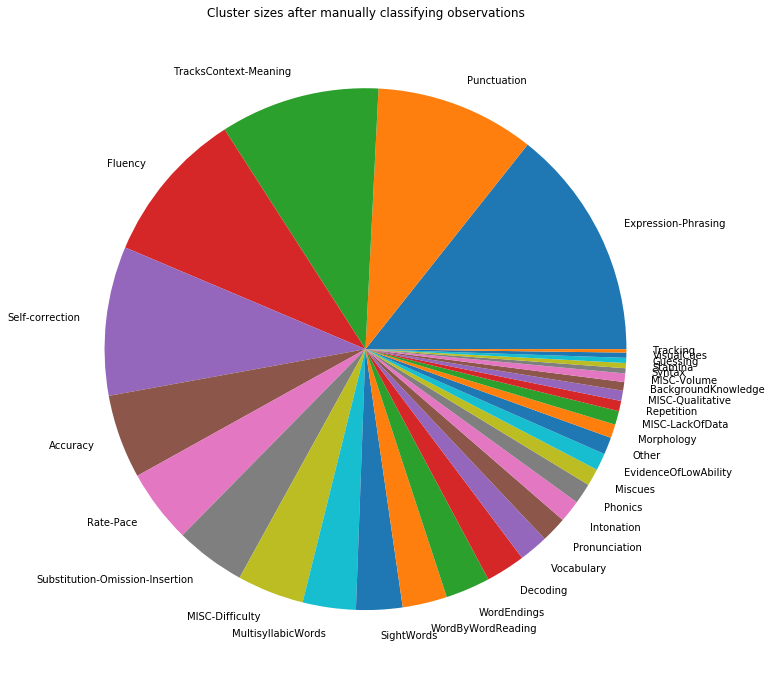

In [4]:
plt.figure(figsize=(12, 12))
plt.title('Cluster sizes after manually classifying observations')
x = sorted(clusters.keys(), key=lambda k: -len(clusters[k]))
plt.pie(
    [
        len(clusters[k])
        for k in x
    ],
    labels=x
)
plt.show()

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../20190715_sug_to_onehot_kw.tsv', sep='\t')

In [7]:
df.shape

(871, 29)

In [8]:
df['fluency'] = df.fluenci | df.fluent
df = df.drop(['fluenci', 'fluent'], axis=1)

In [9]:
df.drop('Unnamed: 28', inplace=True, axis=1)

In [10]:
df['frequent'] = df.frequenc | df.frequent
df = df.drop(['frequenc'], axis=1)

In [11]:
df['pronunciation'] = df.pronunci | df.pronounc
df.drop(['pronunci', 'pronounc'], inplace=True, axis=1)

In [12]:
col_to_cnt = {
    col: sum(df[col])
    for col in df.columns[1:]
}

In [13]:
x = sorted(col_to_cnt.keys(), key=lambda x: col_to_cnt[x])

In [14]:
v = [col_to_cnt[k] for k in x]

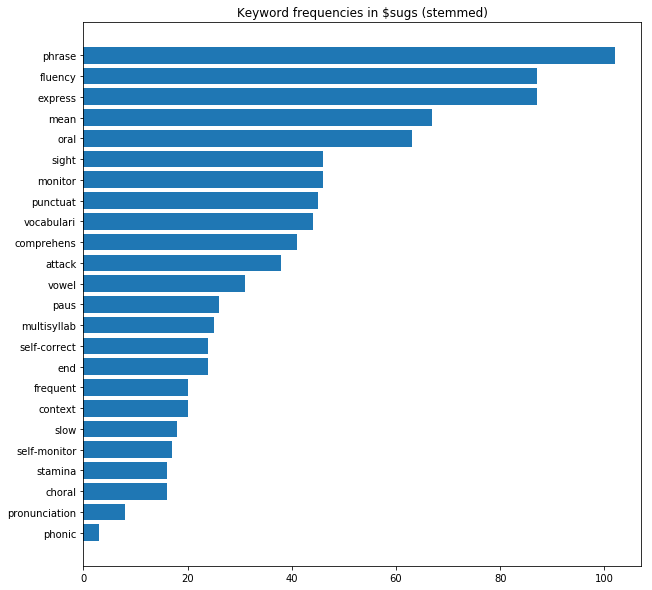

In [15]:
plt.figure(figsize=(10,10))
plt.title('Keyword frequencies in $sugs (stemmed)')
plt.barh(x, v)
plt.show()